## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

sns.set_style(style="whitegrid")
sns.set_palette("pastel")

In [2]:
df = pd.read_csv("../data/churn.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA

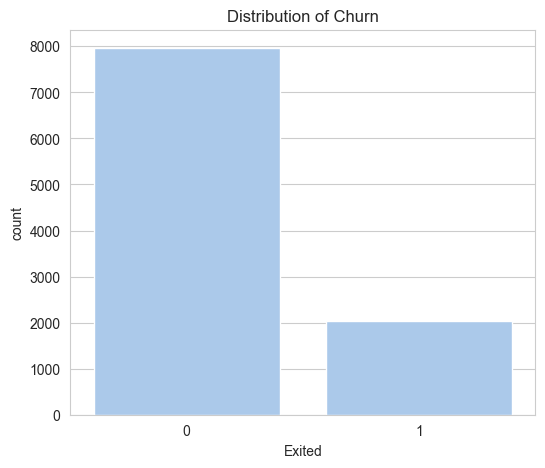

In [4]:
plt.figure(figsize=(6, 5), dpi=100)
sns.countplot(data=df, x="Exited")
plt.title("Distribution of Churn")
plt.show()

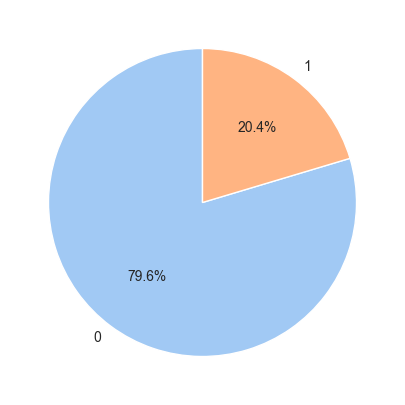

In [5]:
df_agg = df.groupby("Exited").agg(CustomerId_cnt=("CustomerId", "count")).reset_index()

plt.figure(figsize=(6, 5), dpi=100)
plt.pie(df_agg["CustomerId_cnt"], labels=df_agg["Exited"], autopct='%1.1f%%', startangle=90)
plt.show()

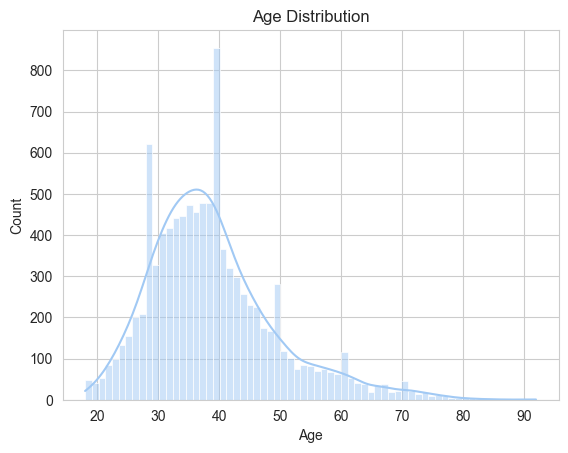

In [6]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")
plt.show()

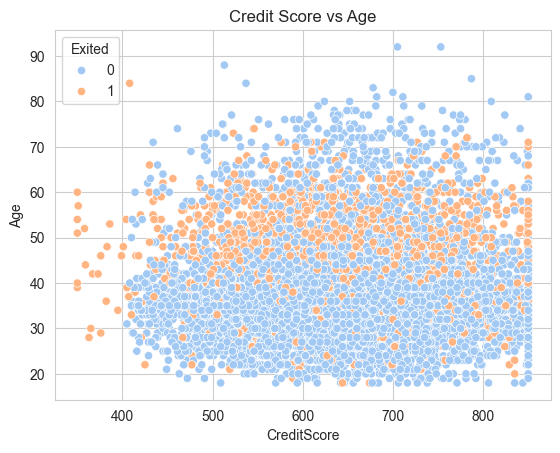

In [7]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")
plt.show()

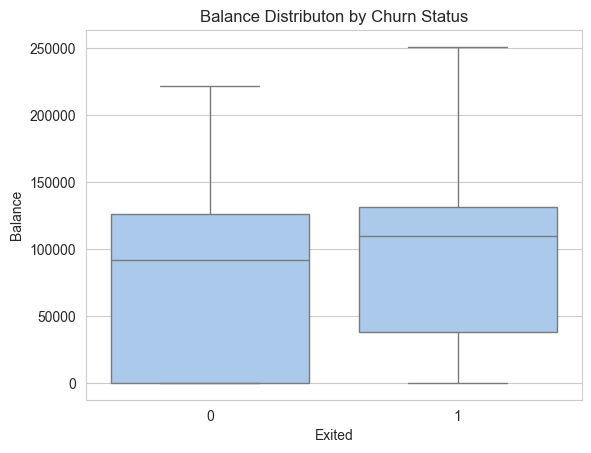

In [8]:
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title("Balance Distributon by Churn Status")
plt.show()

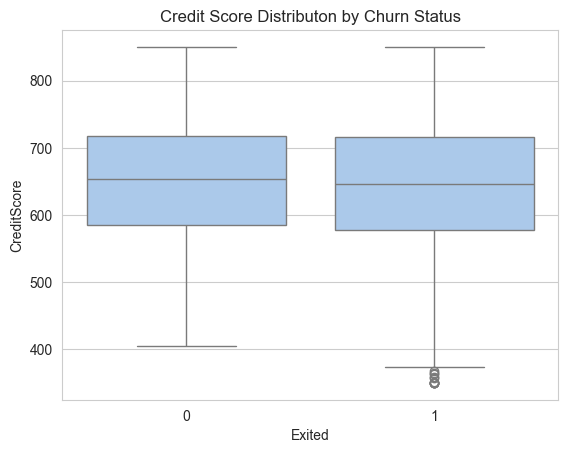

In [9]:
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("Credit Score Distributon by Churn Status")
plt.show()

## Train-Test Split

In [10]:
features = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
print(features.shape)
features.head()

(10000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
target = df["Exited"]
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
features = pd.get_dummies(features, columns=["Geography", "Gender"])
print(features.shape)
features.head()

(10000, 13)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, "\n")

print(y_train.value_counts() / y_train.count(), "\n")
print(y_test.value_counts() / y_test.count())

(8000, 13) (8000,) (2000, 13) (2000,) 

Exited
0    0.7945
1    0.2055
Name: count, dtype: float64 

Exited
0    0.8035
1    0.1965
Name: count, dtype: float64


## Pre-Processing

In [14]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open("../models/scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print(X_train_scaled[0])

[ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
  0.97481699  1.36766974  1.00150113 -0.57946723 -0.57638802 -0.91324755
  0.91324755]


### Test loading scaler

In [15]:
with open("../models/scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

X_train_scaled_new = loaded_scaler.transform(X_train)
print(X_train_scaled_new[0])

(X_train_scaled == X_train_scaled_new).all()

[ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
  0.97481699  1.36766974  1.00150113 -0.57946723 -0.57638802 -0.91324755
  0.91324755]


True

## Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [17]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_predictions = lr_model.predict(X_test_scaled)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

In [19]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    
    print(f"Model saved as {filename}\n\n")

In [22]:
xgb_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=500,
    subsample=0.8,  # fraction of samples used for training trees
    colsample_bytree=0.8,  # fraction of features used for training trees
    objective="binary:logistic",
    # use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
evaluate_and_save_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/dt_model.pkl")

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)
evaluate_and_save_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/svm_model.pkl")

catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    random_seed=42,
    verbose=100
)
evaluate_and_save_model(catboost_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/catboost_model.pkl")

XGBClassifier Accuracy: 0.8595
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.52      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Model saved as ../models/xgb_model.pkl


DecisionTreeClassifier Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Model saved as ../models/dt_model.pkl


RandomForestClassifier Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0

## Feature importance

In [25]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

feature_importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

feature_importances_df = feature_importances_df.sort_values("importance", ascending=False).reset_index(drop=True)
feature_importances_df

,feature,importance
0,NumOfProducts,0.270936
1,IsActiveMember,0.119333
2,Geography_Germany,0.099533
3,Age,0.097777
4,Balance,0.057309
5,Gender_Male,0.048658
6,Gender_Female,0.047926
7,CreditScore,0.044563
8,EstimatedSalary,0.044034
9,Geography_France,0.042873


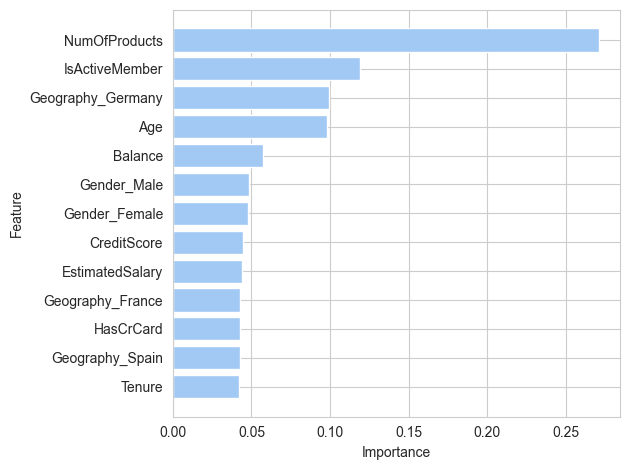

In [26]:
plt.barh(feature_importances_df["feature"][::-1], feature_importances_df["importance"][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Feature Engineering

In [27]:
features["CLV"] = df["Balance"] * df["EstimatedSalary"] / 100_000
features["AgeGroup"] = pd.cut(df["Age"], bins=[0, 30, 45, 60, 100], labels=["Young", "MiddleAge", "Senior", "Elderly"])
features["TenureAgeRatio"] = df["Tenure"] / df["Age"]

features = pd.get_dummies(features, drop_first=True)
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False


In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0])

[ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
  0.97481699  1.36766974  1.00150113 -0.57946723 -0.57638802 -0.91324755
  0.91324755 -0.90936929  0.55605992  0.83383117 -0.44513243 -0.22021079]


In [29]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "../models/xgb_model_feature_eng.pkl")

XGBClassifier Accuracy: 0.8540
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

Model saved as ../models/xgb_model_feature_eng.pkl




## SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(X_train_smote.shape, y_train_smote.shape, "\n")
print(y_train_smote.value_counts() / y_train_smote.count())

(12712, 18) (12712,) 

Exited
0    0.5
1    0.5
Name: count, dtype: float64


In [31]:
evaluate_and_save_model(xgb_model, X_train_smote, X_test_scaled, y_train_smote, y_test, "../models/xgb_model_smote.pkl")

XGBClassifier Accuracy: 0.8540
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.58      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Model saved as ../models/xgb_model_smote.pkl




## Ensemble

In [32]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("xgboost", xgb.XGBClassifier(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svm", SVC(random_state=42, probability=True))
    ],
    voting="soft"
)

evaluate_and_save_model(voting_clf, X_train_smote, X_test_scaled, y_train_smote, y_test, "../models/voting_clf.pkl")

VotingClassifier Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.63      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Model saved as ../models/voting_clf.pkl


